In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget

In [64]:
# Download historical data
start_date = "2022-10-24"
end_date =  "2023-10-31"

cerebro = bt.Cerebro()
for symbol in ['QQQ', 'SPY', 'GLD']:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date,multi_level_index=False))
    cerebro.adddata(data, name=symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [136]:
df=yf.download("DVN", start="2023-07-06", end=end_date,multi_level_index=False)
df.head()


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2023-07-06,44.699711,45.564565,43.900664,45.122737,9501500
2023-07-07,45.921783,46.420016,44.276684,44.361289,9695500
2023-07-10,46.241405,46.476420,45.498763,45.649172,5793500
2023-07-11,47.529285,47.745498,46.561024,46.767838,8670800
2023-07-12,48.027519,48.478746,47.726701,48.130926,7640900


In [4]:
from collections import defaultdict
class IndicatorObserver(bt.observer.Observer):
    lines = ('qqq_ma', 'spy_fast_ma', 'spy_slow_ma')
    plotlines = dict(
        qqq_ma=dict(color='blue'),
        spy_fast_ma=dict(color='green'),
        spy_slow_ma=dict(color='red')
    )

    def next(self):
        self.lines.qqq_ma[0] = self.strategy.qqq_ma[0]
        self.lines.spy_fast_ma[0] = self.strategy.spy_fast_ma[0]
        self.lines.spy_slow_ma[0] = self.strategy.spy_slow_ma[0]


In [2]:
class PrintClose(bt.Strategy):

    def __init__(self):
        #Keep a reference to the "close" line in the data[0] dataseries
        self.qqq = self.datas[0]
        self.spy = self.datas[1]
        self.gld = self.datas[2]

        self.qqq_ma = bt.indicators.SimpleMovingAverage(self.qqq, period=30)
        self.spy_fast_ma = bt.indicators.SimpleMovingAverage(self.spy, period=50)
        self.spy_slow_ma = bt.indicators.SimpleMovingAverage(self.spy, period=200)

        self.qqq_cross = bt.indicators.CrossOver(self.qqq, self.qqq_ma)
        self.spy_cross = bt.indicators.CrossOver(self.spy_fast_ma, self.spy_slow_ma)

    def log(self, txt, value1=None, value2=None, value3=None):
        dt = self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt} {value1} {value2} {value3}') 

    def next(self):
        # self.log('qqq: ', self.qqq[0]) 
        self.log('spy_cross: ', self.spy_cross[0], self.spy_fast_ma[0], self.spy_slow_ma[0]) 
        self.log('qqq_cross: ', self.qqq_cross[0], self.qqq_ma[0], self.qqq[0]) 

cerebro = bt.Cerebro()

start_date = "2023-01-01"
end_date =  "2023-10-31"
for symbol in ['QQQ', 'SPY', 'GLD']:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date,multi_level_index=False))
    cerebro.adddata(data, name=symbol)

#Add strategy to Cerebro
cerebro.addstrategy(PrintClose)

#Run Cerebro Engine
cerebro.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2023-10-19 spy_cross:  0.0 430.11348693847657 412.6021711730957
2023-10-19 qqq_cross:  0.0 361.9041392008464 356.9423828125
2023-10-20 spy_cross:  0.0 429.65814514160155 412.8069174194336
2023-10-20 qqq_cross:  0.0 361.32764587402346 351.6175231933594
2023-10-23 spy_cross:  0.0 429.1935400390625 413.0293733215332
2023-10-23 qqq_cross:  0.0 360.6416269938151 352.67852783203125
2023-10-24 spy_cross:  0.0 428.7430700683594 413.22510940551757
2023-10-24 qqq_cross:  0.0 360.2079325358073 356.10943603515625
2023-10-25 spy_cross:  0.0 428.27532470703125 413.39202133178713
2023-10-25 qqq_cross:  0.0 359.4368367513021 347.39337158203125
2023-10-26 spy_cross:  0.0 427.77293701171874 413.521123046875
2023-10-26 qqq_cross:  0.0 358.3439524332682 340.76959228515625
2023-10-27 spy_cross:  0.0 427.29942504882814 413.6170082092285
2023-10-27 qqq_cross:  0.0 357.51881815592446 342.4056701660156
2023-10-30 spy_cross:  0.0 426.9183630371094 413.7300323486328
2023-10-30 qqq_cross:  0.0 356.80950215657555 

In [33]:
class QuantStrategy(bt.Strategy):
    params = (
        ('qqq_ma_period', 30),
        ('spy_fast_ma', 50),
        ('spy_slow_ma', 200),
    )

    def __init__(self):
        self.qqq = self.datas[0]
        self.spy = self.datas[1]
        self.gld = self.datas[2]

        self.qqq_ma = bt.indicators.SimpleMovingAverage(self.qqq, period=self.p.qqq_ma_period)
        self.spy_fast_ma = bt.indicators.SimpleMovingAverage(self.spy, period=self.p.spy_fast_ma)
        self.spy_slow_ma = bt.indicators.SimpleMovingAverage(self.spy, period=self.p.spy_slow_ma)

        self.qqq_cross = bt.indicators.CrossOver(self.qqq, self.qqq_ma)
        self.spy_cross = bt.indicators.CrossOver(self.spy_fast_ma, self.spy_slow_ma)

    def log(self, txt, value1=None, value2=None, value3=None):
        pass
        # print(f'{txt}') 
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # An active Buy/Sell order has been submitted/accepted - Nothing to do
            return
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %(order.executed.price, order.executed.value, order.executed.comm))
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %(order.executed.price,order.executed.value,order.executed.comm))
            self.bar_executed = len(self)
    
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
    
        # Reset orders
        self.order = None
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
    
        self.log('GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
    def next(self):
        curr_dt = self.datas[0].datetime.date(0)
        qqq_position = (self.getposition(self.qqq).size>0)
        gld_position = (self.getposition(self.gld).size>0)
        spy_position = (self.getposition(self.spy).size>0)
        
        # if not self.position: # if there's no position
        if (not qqq_position) and (not gld_position) and (not spy_position): 
            if (self.qqq_cross > 0) | (self.qqq_cross[-1] > 0) :  # Nasdaq 100 crosses above 30-day MA on curr or prev day

                # if self.qqq_cross <0:
                #     pass
                # else:
                self.buy(data=self.qqq, size=None)

                self.log(f'{curr_dt} QQQ BUY CREATED --- Price: {self.qqq.close[0]:.2f} ') 
                #print("qqq position: "+ str(self.order))

            elif (self.spy_cross > 0) | (self.spy_cross[-1] > 0):   # S&P 500 Golden Cross
                # if self.spy_cross <0:
                #     pass
                # else:
                self.buy(data=self.spy, size=None)
                self.log(f'{curr_dt} SPY BUY CREATED --- Price: {self.spy.close[0]:.2f} ')
            
            elif (self.qqq_cross[-1] < 0) | (self.spy_cross[-1] < 0):
                
                # print("Portfolio value: "+str(self.broker.getvalue()))
                self.buy(data=self.gld, size=None) # , tradeid=self.curtradeid
                self.log(f'{curr_dt} GLD BUY CREATED --- Price: {self.gld.close[0]:.2f} ')
                
        else:
            
            if qqq_position:
                # if self.qqq_cross < 0:  # Nasdaq 100 crosses below 30-day MA
                if (self.qqq_cross < 0) | (self.qqq_cross[-1] < 0):
                    # self.order = self.qqq.order_target_percent(target=0)
                    self.close(data=self.qqq, size=None) # , tradeid=self.curtradeid
                    self.log(f'{curr_dt} QQQ SELL CREATED --- Price: {self.qqq.close[0]:.2f} ')
                    
                    
            elif spy_position:
                # if self.spy_cross < 0:  # S&P 500 Death Cross
                if (self.spy_cross < 0) | (self.spy_cross[-1] < 0):
                    self.close(data=self.spy, size=None)
                    self.log(f'{curr_dt} SPY SELL CREATED --- Price: {self.spy.close[0]:.2f} ')

            elif gld_position:
                if self.qqq_cross > 0:
                    self.close(data=self.gld, size=None)
                    self.log(f'{curr_dt} GLD SELL CREATED --- Price: {self.gld.close[0]:.2f} ')

                elif self.spy_cross > 0:
                    self.close(data=self.gld, size=None)
                    self.log(f'{curr_dt} GLD SELL CREATED --- Price: {self.gld.close[0]:.2f} ')



In [34]:
cerebro = bt.Cerebro()

start_date = "2005-09-14"
end_date =  "2024-10-31"
for symbol in ['QQQ', 'SPY', 'GLD']:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date, multi_level_index=False))
    cerebro.adddata(data, name=symbol)



cerebro.addstrategy(QuantStrategy)

# cerebro.addobserver(IndicatorObserver)

# Set initial capital
cerebro.broker.setcash(100000)
cerebro.broker.set_coc(True)
# cerebro.broker.set_fundmode(True)
cerebro.addsizer(bt.sizers.AllInSizerInt, percents = 99.8)  
# Add analyzers
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.PyFolio)
cerebro.addanalyzer(bt.analyzers.TimeReturn, fund=True)  # track fund value

# Run the backtest
results = cerebro.run()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Bactest Period From 2005-09-14 To 2024-10-31
Final Portfolio Value: $1161137.88
Total compound return: 245.20%
Average return for the entire period (timeframe specific): 0.05%
Annualized/Normalized return expressed in 100%: 13.69%
Max Drawdown: 29.32%
Max Moneydown: 305288.63215637207
Max Drawdown Length: 433


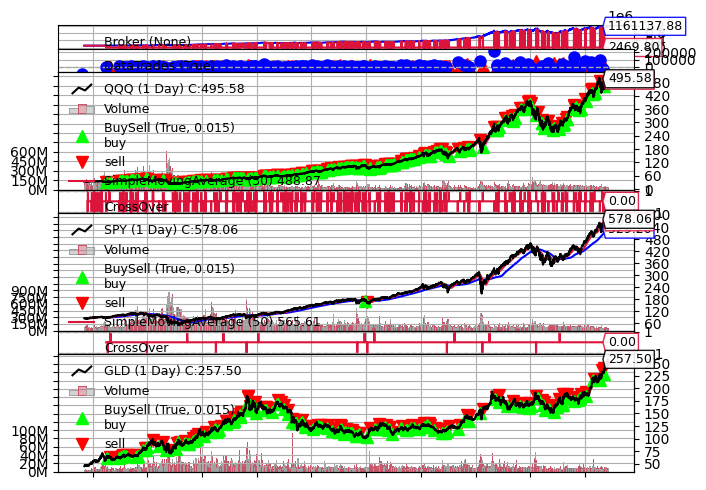

[[<Figure size 640x480 with 10 Axes>]]

In [38]:
# Print results
print("Bactest Period From "+start_date+" To "+ end_date)
print(f"Final Portfolio Value: ${cerebro.broker.getvalue():.2f}")
#print(f"Sharpe Ratio: {results[0].analyzers.sharpe_ratio.get_analysis()['sharperatio']:.2f}")
print(f"Total compound return: {results[0].analyzers.returns.get_analysis()['rtot']:.2%}")
print(f"Average return for the entire period (timeframe specific): {results[0].analyzers.returns.get_analysis()['ravg']:.2%}")
print(f"Annualized/Normalized return expressed in 100%: {results[0].analyzers.returns.get_analysis()['rnorm100']:.2f}%")

print(f"Max Drawdown: {results[0].analyzers.drawdown.get_analysis()['max']['drawdown']:.2f}%")
print("Max Moneydown: "+str(results[0].analyzers.drawdown.get_analysis()['max']['moneydown']))
print("Max Drawdown Length: "+str(results[0].analyzers.drawdown.get_analysis()['max']['len']))
# Plot the results
# Then plot with explicit show
cerebro.plot(iplot = False)


In [36]:
pyfolio = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfolio.get_pf_items()
#pyfolio.get_pf_items()

In [25]:
returns.reset_index()

,index,return
0,2005-09-14 00:00:00+00:00,0.000000
1,2005-09-15 00:00:00+00:00,0.000000
2,2005-09-16 00:00:00+00:00,0.000000
3,2005-09-19 00:00:00+00:00,0.000000
4,2005-09-20 00:00:00+00:00,0.000000
...,...,...
4810,2024-10-24 00:00:00+00:00,0.008090
4811,2024-10-25 00:00:00+00:00,0.006079
4812,2024-10-28 00:00:00+00:00,0.000161
4813,2024-10-29 00:00:00+00:00,0.009586


In [16]:
transactions.to_csv('backtest_old.csv')

In [130]:
positions.head(300)

,GLD,cash
Datetime,,
2005-09-13 00:00:00+00:00,0.0,100000.000000
2005-09-14 00:00:00+00:00,0.0,100000.000000
2005-09-15 00:00:00+00:00,0.0,100000.000000
2005-09-16 00:00:00+00:00,0.0,100000.000000
2005-09-19 00:00:00+00:00,0.0,100000.000000
...,...,...
2006-11-13 00:00:00+00:00,0.0,223.657043
2006-11-14 00:00:00+00:00,0.0,223.657043
2006-11-15 00:00:00+00:00,0.0,223.657043


In [37]:
transactions.merge(positions, how='left', left_index=True, right_index=True).merge(returns, how='left', left_index=True, right_index=True).to_csv('backtest_new_t_minus_1.csv')

In [27]:
returns.to_csv('returns_new.csv')